In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df=pd.read_html(url, match="Регіон")

# Вивести перші рядки таблиці за допомогою методу head
tabl = df[0]
df[0].head() 
tabl.head()


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [35]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
df[0].shape

(28, 9)

In [36]:
# Замініть у таблиці значення "—" на значення NaN
new_tabl = tabl.replace(to_replace= "—", value= np.nan)
new_tabl

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [37]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
new_tabl.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [39]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
new_tabl["2014"] = pd.to_numeric(new_tabl["2014"])
new_tabl["2019"] = pd.to_numeric(new_tabl["2019"])
new_tabl.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

In [40]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
new_tabl.isnull().sum()/new_tabl.shape[0]

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

In [42]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
new_tabl_2 = new_tabl.drop([27])

In [54]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
v_1950 = new_tabl["1950"].mean().round(1)
v_1960 = new_tabl["1960"].mean().round(1)
v_1970 = new_tabl["1970"].mean().round(1)
v_1990 = new_tabl["1990"].mean().round(1)
v_2000 = new_tabl["2000"].mean().round(1)
v_2012 = new_tabl["2012"].mean().round(1)
v_2014 = new_tabl["2014"].mean().round(1)
v_2019 = new_tabl["2019"].mean().round(1)

new_tabl_3 = new_tabl_2.fillna( { "1950":  v_1950, "1960": v_1960, "1970": v_1970, "1990": v_1990,
                                  "2000":  v_2000, "2012":  v_2012, "2014":  v_2014, "2019": v_2019,})
new_tabl_3

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.4,80.2
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,80.2
5,Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
7,Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
9,Київська,204.0,189.0,156.0,123,73,122,121.0,80.0


In [56]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
tab2019 = new_tabl_3["2019"].mean().round(1)
tab2019
new_tabl_3[new_tabl_3["2019"] > tab2019][["Регіон", "2019"]]

,Регіон,2019
2,Волинська,101.0
6,Закарпатська,104.0
8,Івано-Франківська,88.0
12,Львівська,87.0
14,Одеська,88.0
16,Рівненська,107.0
20,Херсонська,81.0
23,Чернівецька,92.0
25,Київ,110.0


In [61]:
# У якому регіоні була найвища народжуваність у 2014 році
tab2014 = new_tabl_3[["Регіон", "2014"]]
max2014 = tab2014["2014"].max()
# max2014
tab2014[tab2014["2014"] == max2014]

,Регіон,2014
16,Рівненська,148.0


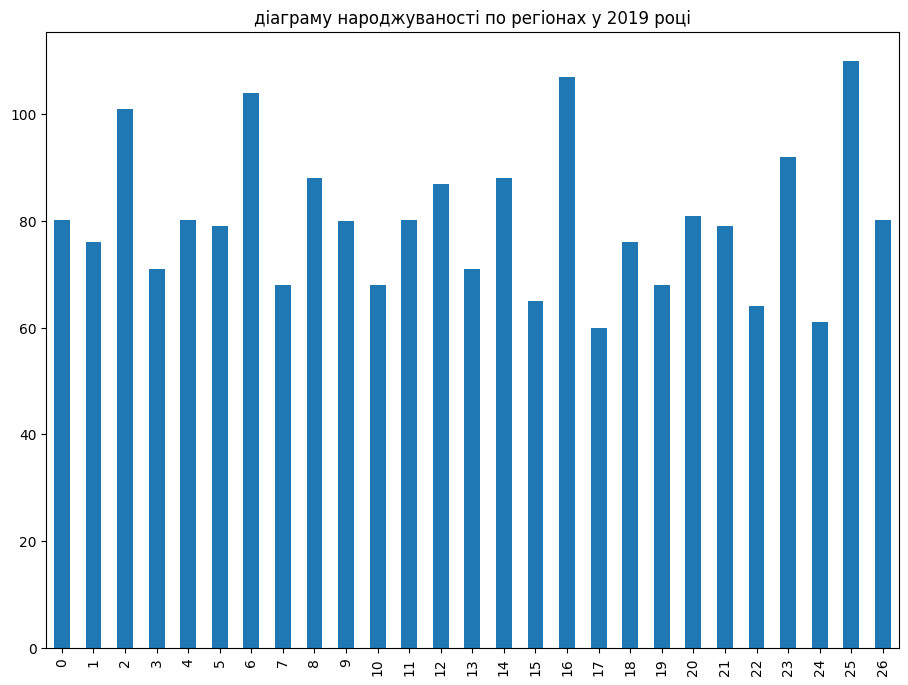

In [71]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
new_tabl_3["2019"].plot.bar(title = "діаграму народжуваності по регіонах у 2019 році", figsize=(11, 8) )
plt.show()

In [1]:
'Візуалізація'


'Візуалізація'

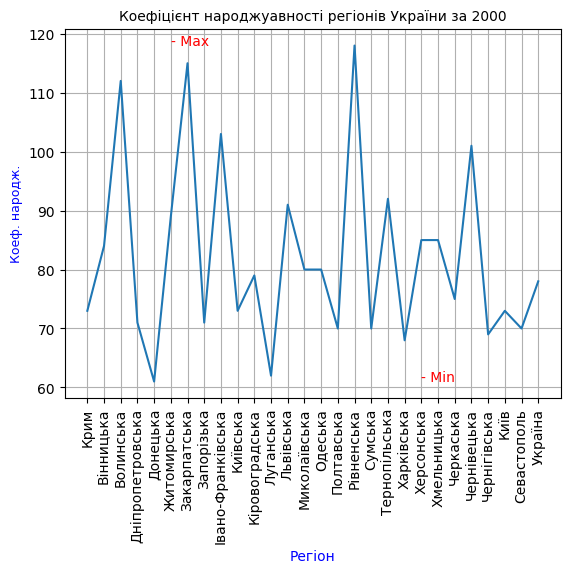

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df = pd.read_html(url, match="Регіон")
tabl = df[0]
tabl.head() 

tabl_2000= tabl["2000"]
plt.plot(tabl["Регіон"], tabl_2000)
plt.xticks(rotation='vertical')
plt.title("Коефіцієнт народжуавності регіонів України за 2000", fontsize=10)
plt.xlabel("Регіон", color="blue", fontsize=10)
plt.ylabel("Коеф. народж.", color="blue", fontsize=9)
plt.text(5, tabl_2000.max(), "- Max", color="red")
plt.text(20, tabl_2000.min(), "- Min", color="red")
plt.grid()
plt.show()

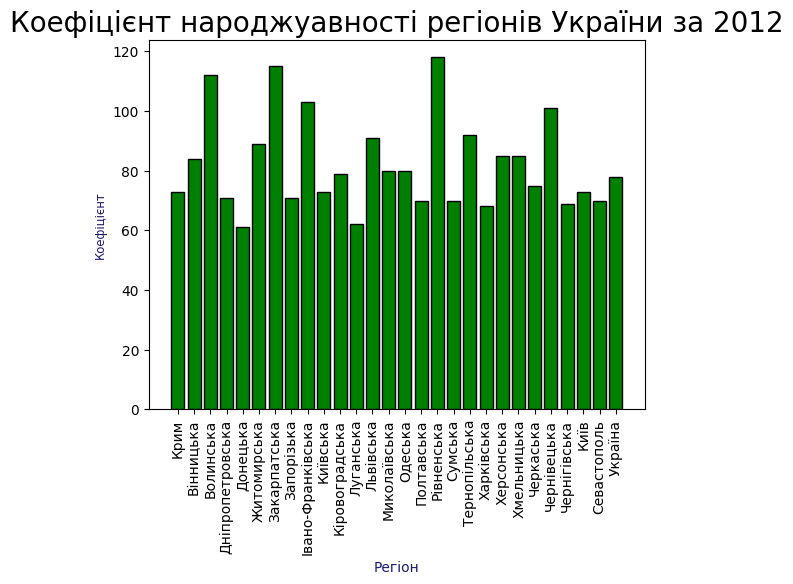

In [7]:
'2'
plt.bar(tabl["Регіон"], tabl_2000,
        color=[ "g" ],
        edgecolor="black")

plt.xlabel('Регіон', color="midnightblue" )
plt.xticks(rotation='vertical')

plt.ylabel("Коефіцієнт", fontsize="small", color="midnightblue")
plt.title("Коефіцієнт народжуавності регіонів України за 2012",  fontsize=20)
plt.show()

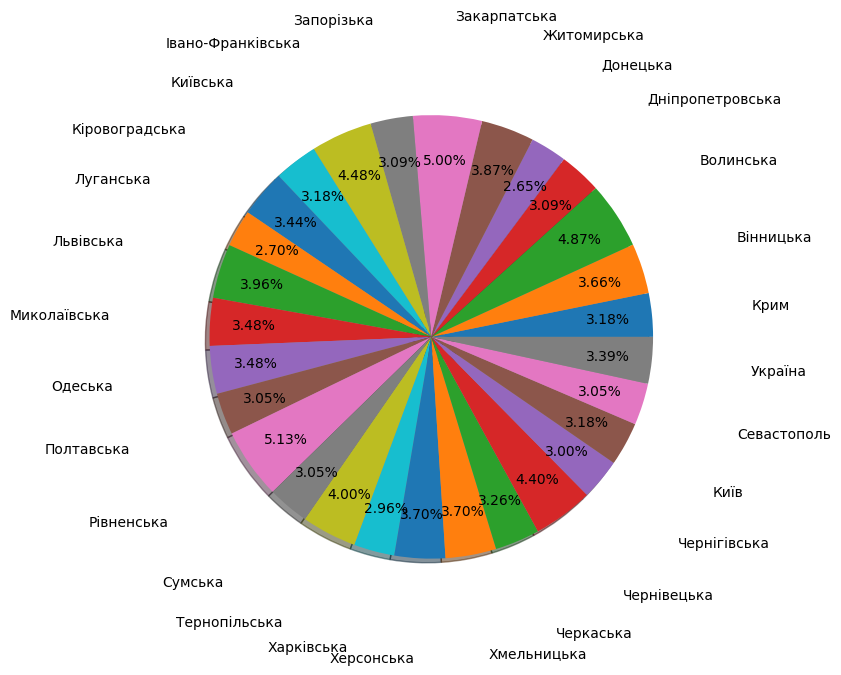

In [8]:
'3'
data = [round(i) for i in tabl_2000]
plt.pie(data,
        labels=tabl["Регіон"],
        shadow=True,
        radius=1.5,
        autopct="%.2f%%",
        pctdistance=0.8,
        labeldistance=1.45)
plt.show()